In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_pickle('../Downloads/BikesDataVars_new.pkl')
data.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [5]:
mount_weather = data.groupby(data['Date'].dt.month)['Temperature'].mean()
mount_weather

Date
1     -3.957460
2     -1.677009
3      8.049597
4     12.970278
5     18.129368
6     23.134375
7     27.766062
8     28.719556
9     21.490208
10    13.095161
11     7.785069
12    -1.932594
Name: Temperature, dtype: float64

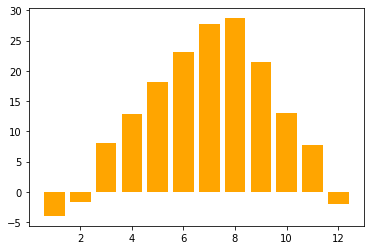

In [8]:
plt.bar(mount_weather.index, mount_weather, color='orange');

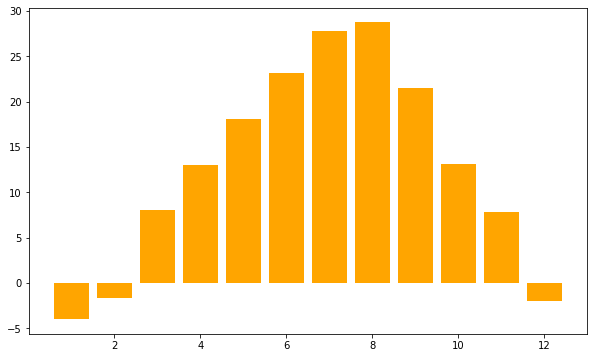

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(mount_weather.index, mount_weather, color='orange');

In [16]:
bikes_sum = data.groupby(data['Date'].dt.isocalendar().week)['Rental Count'].sum()
bikes_sum

week
1      39441
2      30871
3      42193
4      23079
5      28415
6      33259
7      32139
8      50136
9      52958
10     77316
11     90547
12     79109
13    118031
14     97000
15     98468
16    142918
17    141147
18    146127
19    136607
20    142346
21    189749
22    210326
23    211869
24    220392
25    213553
26    146455
27    183652
28    154848
29    172636
30    163447
31    135086
32    147911
33    166679
34    152282
35    138529
36    191800
37    186208
38    103925
39    124820
40     99622
41    159527
42    185695
43    141509
44    123557
45     66682
46    142787
47    103454
48    107727
49     48680
50     40147
51     31938
52     34460
Name: Rental Count, dtype: int64

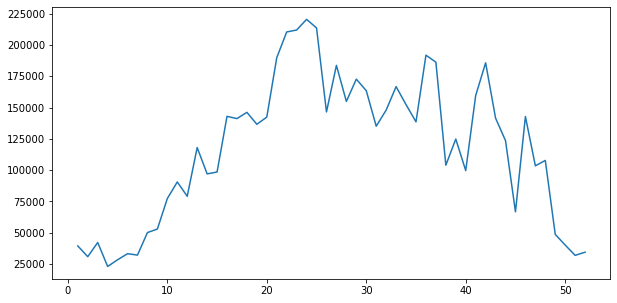

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(bikes_sum)

In [20]:
seasons = data.groupby(['Seasons', 'Date'])['Rental Count'].sum()
seasons

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

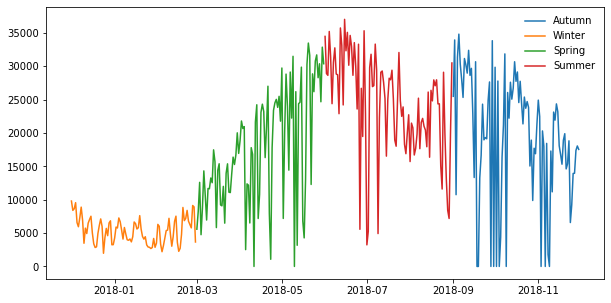

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(seasons.loc['Autumn'])
ax.plot(seasons.loc['Winter'])
ax.plot(seasons.loc['Spring'])
ax.plot(seasons.loc['Summer']);
ax.legend(['Autumn', 'Winter', 'Spring', 'Summer'], frameon=False);

In [31]:
daily_temp = data.groupby(['Seasons', 'Date'])['Temperature'].mean()
daily_temp

Seasons  Date      
Autumn   2018-09-01    25.402083
         2018-09-02    24.987500
         2018-09-03    23.604167
         2018-09-04    23.254167
         2018-09-05    23.783333
                         ...    
Winter   2018-02-24     2.762500
         2018-02-25     1.916667
         2018-02-26     2.725000
         2018-02-27     3.958333
         2018-02-28     4.850000
Name: Temperature, Length: 365, dtype: float64

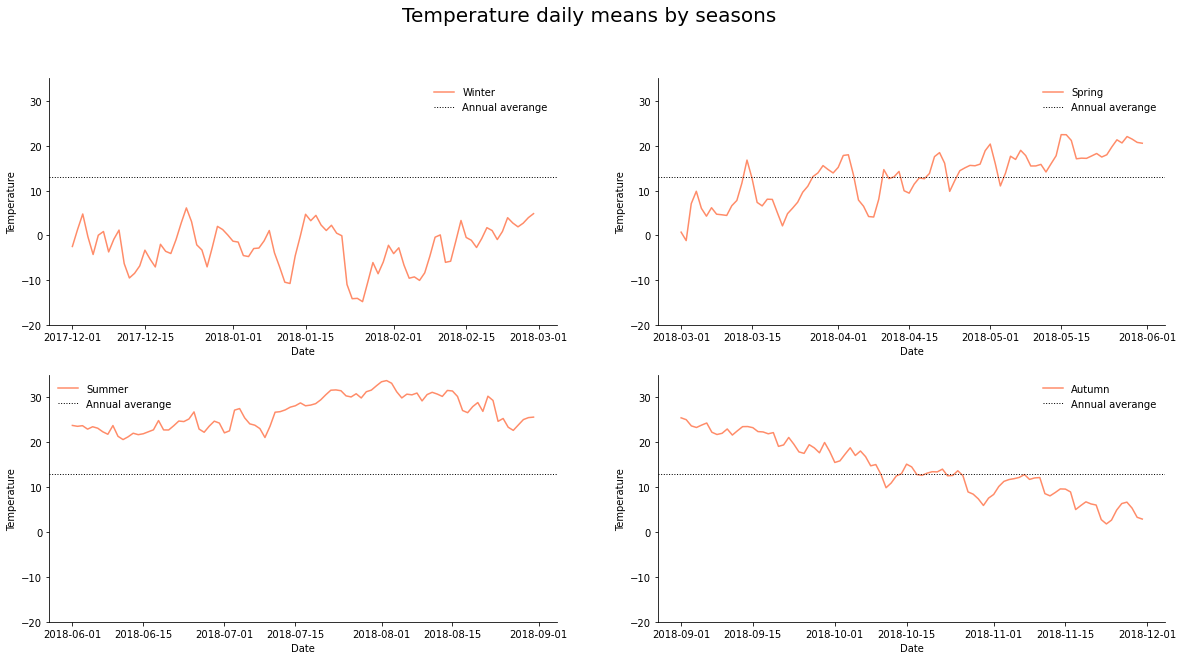

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].plot(daily_temp.loc['Winter'], c='#ff8c69')
ax[0][1].plot(daily_temp.loc['Spring'], c='#ff8c69')
ax[1][0].plot(daily_temp.loc['Summer'], c='#ff8c69')
ax[1][1].plot(daily_temp.loc['Autumn'], c='#ff8c69')

for axis in ax.ravel():#ravel разворачивает матрицу в массив
    axis.set_ylim(-20, 35)
    axis.set_xlabel('Date')
    axis.set_ylabel('Temperature')
    axis.axhline(12.9, c='black', lw=1, ls=':')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
ax[0][0].legend(['Winter', 'Annual averange'], frameon=False)
ax[0][1].legend(['Spring', 'Annual averange'], frameon=False)
ax[1][0].legend(['Summer', 'Annual averange'], frameon=False)
ax[1][1].legend(['Autumn', 'Annual averange'], frameon=False)

fig.suptitle('Temperature daily means by seasons', fontsize=20);

In [57]:
fig.savefig('temps.pdf')

In [64]:
data['No work day'] = np.where(data['Date'].dt.day_name().isin(['Saturday', 'Sunday']) + data['Holiday'], 1, 0)
data['Rainfall and Snowfall'] = data['Rainfall'] * 10 + data['Snowfall']

bikes_sum = data.groupby('Date')['Rental Count'].sum()
temp_av = data.groupby('Date')['Temperature'].mean()
rainsnow_av = data.groupby('Date')['Rainfall and Snowfall'].mean()
now_work = data.groupby('Date')['No work day'].max()

bikes_date = pd.concat([bikes_sum, temp_av, rainsnow_av, now_work], axis=1)
bikes_date

,Rental Count,Temperature,Rainfall and Snowfall,No work day
Date,,,,
2017-12-01,9802,-2.454167,0.000000,0
2017-12-02,8404,1.320833,0.000000,1
2017-12-03,8644,4.777083,1.666667,1
2017-12-04,9556,-0.304167,0.041667,0
2017-12-05,6578,-4.241667,0.000000,0
...,...,...,...,...
2018-11-26,13934,6.320833,0.120833,0
2018-11-27,13964,6.631250,0.000000,0
2018-11-28,17378,5.316667,0.000000,0


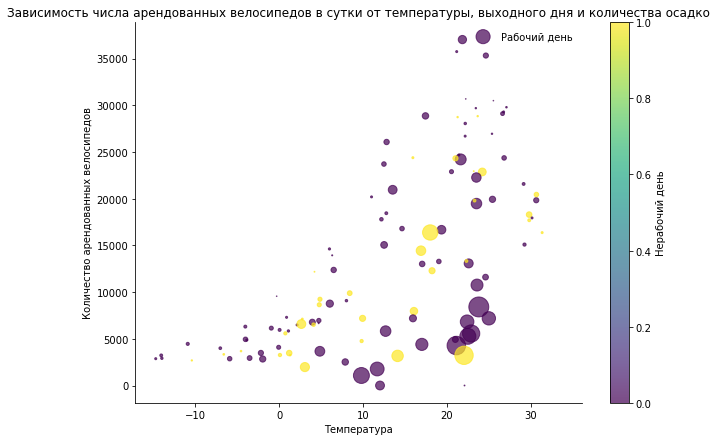

In [81]:
fig, ax = plt.subplots(figsize=(10, 7))
graph = ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'],
           c = bikes_date['No work day'], s=bikes_date['Rainfall and Snowfall'] * 10,
          alpha=0.7);

plt.colorbar(graph, label='Нерабочий день')
ax.set_title('Зависимость числа арендованных велосипедов в сутки от температуры, выходного дня и количества осадко')
ax.set_ylabel('Количество арендованных велосипедов')
ax.set_xlabel('Температура')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(['Рабочий день'], frameon=False);

In [2]:
fig.savefig('temp.pdf')

NameError: name 'fig' is not defined

In [14]:
dt = pd.read_csv('../Downloads/TenthCircuit.csv')
dt

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII
...,...,...,...,...,...,...,...,...,...,...
949,Haimour v. Gonzales,01/31/06,1,Henry,McKay,Murphy,0,0,0,Immigration
950,Infanzon v. Gonzales,01/24/06,1,Henry,McKay,Murphy,0,0,0,Immigration
951,Otero v. Gonzales,01/24/06,1,Tymkovich,Porfilio,Baldock,0,0,0,Immigration
952,Infanzon v. Comfort,01/18/06,1,Briscoe,Lucero,Murphy,0,0,0,Immigration


In [42]:
vt = dt[dt[['Vote1', 'Vote2', 'Vote3']].sum(axis=1) % 3 == 0]
only_vt = vt.groupby('Category')[['Vote1', 'Vote2', 'Vote3']].sum()
only_vt

,Vote1,Vote2,Vote3
Category,,,
Immigration,47,47,47
Title VII,59,59,59


Date
1     11
2      4
3      4
4      9
5      1
6      2
7      6
8      7
9      4
10     1
11     1
12     5
Name: Issue, dtype: int64


C:\Users\Professional\AppData\Local\Temp\ipykernel_10580\338267611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_2016['Issue'] = 1


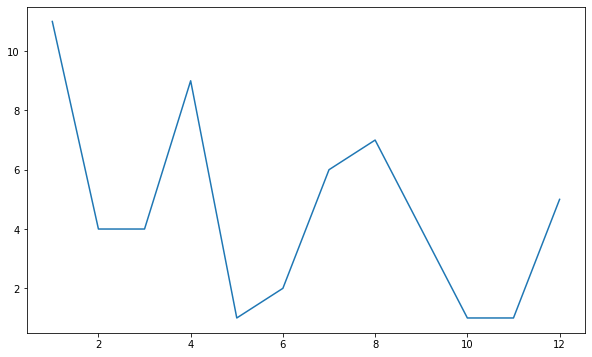

In [71]:
dt['Date'] = pd.to_datetime(dt['Date'])
temp_2016 = dt[dt['Date'].dt.year == 2016]
temp_2016['Issue'] = 1

fig, ax = plt.subplots(figsize=(10,6))
print(temp_2016.groupby(temp_2016['Date'].dt.month)['Issue'].sum())
ax.plot(temp_2016.groupby(temp_2016['Date'].dt.month)['Issue'].sum())

In [86]:
seasons = []
for month in dt['Date'].dt.month:
    if month in [12, 1, 2]:
        seasons.append('Winter')
    elif month in [3, 4, 5]:
        seasons.append('Spring')
    elif month in [6, 7, 8]:
        seasons.append('Summer')
    else:
        seasons.append('Aut')
        
dt['Seasons'] = seasons
mean = dt.groupby('Seasons')['Issue'].mean()
mean

Seasons
Aut       1.025510
Spring    1.038462
Summer    1.042308
Winter    1.045455
Name: Issue, dtype: float64

In [118]:
judge_count = dt[dt['Category'] == 'Immigration']
jd = pd.concat([judge_count.groupby('Judge1')['Issue'].sum(),
               judge_count.groupby('Judge2')['Issue'].sum(),
               judge_count.groupby('Judge3')['Issue'].sum()], axis=1)
jd['sum'] = jd.sum(axis=1)
jd.sort_values(by='sum', ascending=False)

,Issue,Issue,Issue,sum
Tymkovich,46.0,28.0,49.0,123.0
Hartz,76.0,11.0,18.0,105.0
Lucero,75.0,13.0,14.0,102.0
Porfilio,4.0,89.0,7.0,100.0
Holmes,27.0,7.0,62.0,96.0
Baldock,NaN,55.0,41.0,96.0
Anderson,NaN,63.0,32.0,95.0
O'Brien,28.0,22.0,41.0,91.0
Kelly,84.0,4.0,2.0,90.0
Briscoe,73.0,5.0,7.0,85.0


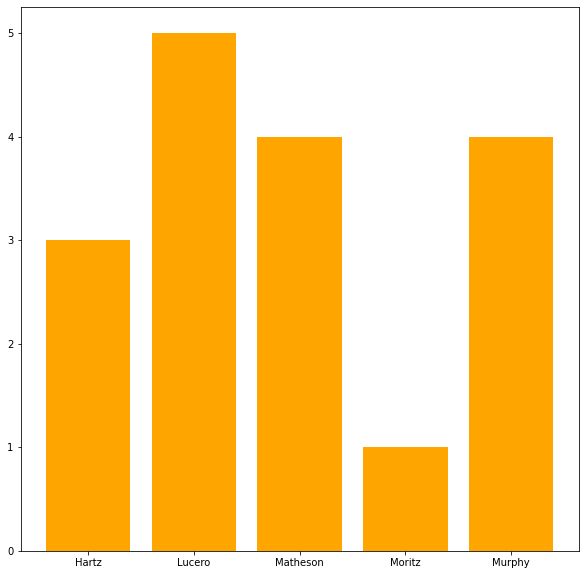

In [162]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(jd.index[:5], jd['sum'][:5], color='orange');

In [154]:
tmp = dt[(dt['Title'] == 'Tabor v. Hilti, Inc.') |
   (dt['Title'] == 'Semsroth v. City of Wichita  ') |
   (dt['Title'] == 'Garcia v. Holder') |
   (dt['Title'] == 'Singh v. Holder') |
   (dt['Title'] == 'Flitton v. Primary Residential Mortg., Inc.')]

jd = pd.concat([tmp.groupby('Judge1')['Issue'].sum(),
               tmp.groupby('Judge2')['Issue'].sum(),
               tmp.groupby('Judge3')['Issue'].sum()], axis=1)
jd['sum'] = jd.sum(axis=1)
jd.sort_values(by='sum', ascending=False)

,Issue,Issue,Issue,sum
Lucero,5.0,NaN,NaN,5.0
Matheson,1.0,NaN,3.0,4.0
Murphy,1.0,2.0,1.0,4.0
Tacha,4.0,NaN,NaN,4.0
Baldock,NaN,1.0,3.0,4.0
Gorsuch,NaN,NaN,4.0,4.0
Hartz,1.0,NaN,2.0,3.0
McKay,NaN,3.0,NaN,3.0
O'Brien,NaN,3.0,NaN,3.0
Porfilio,NaN,3.0,NaN,3.0


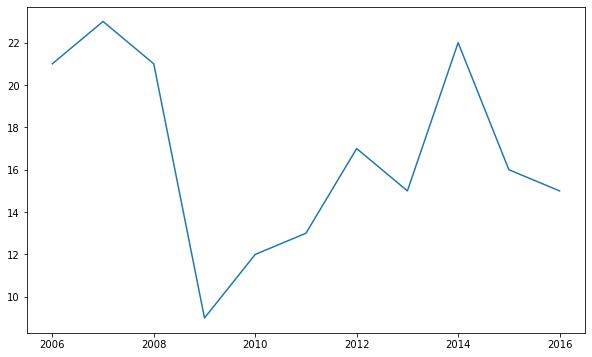

In [166]:
tmp = dt[(dt['Judge1'] == 'Lucero') |
   (dt['Judge2'] == 'Lucero') |
   (dt['Judge3'] == 'Lucero')]
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(tmp.groupby(tmp['Date'].dt.year)['Issue'].sum())

In [2]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


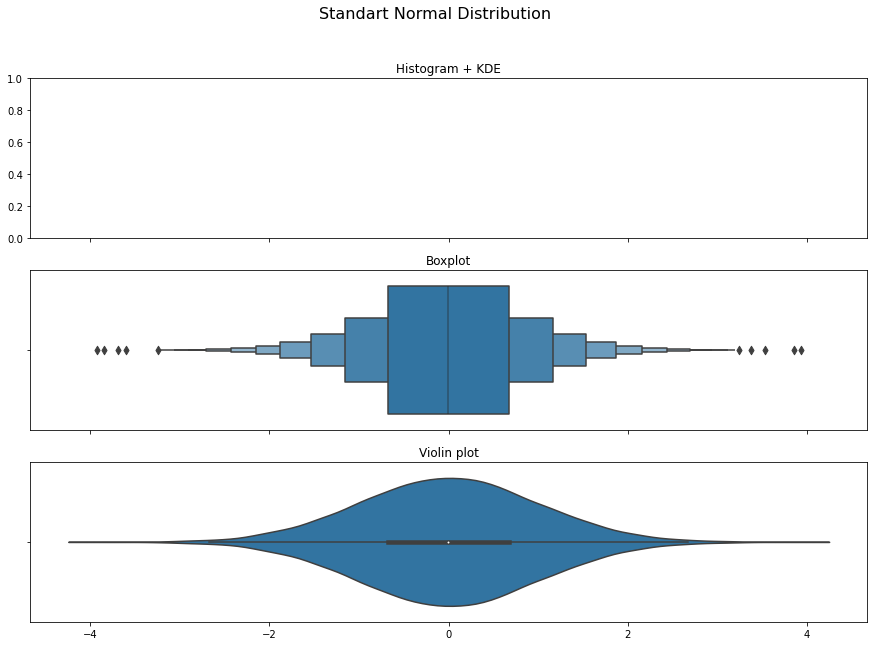

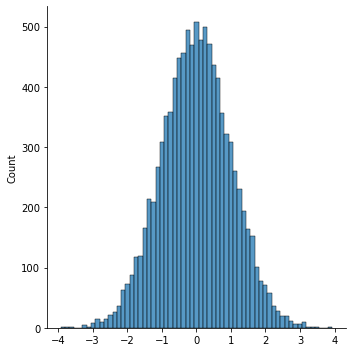

In [170]:
N = 10 ** 4
np.random.seed(42)

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 10))
    sns.displot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxenplot(x=x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x=x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()
    
sample_gaussian = np.random.normal(size=N)
plot_comparison(sample_gaussian, 'Standart Normal Distribution')

In [3]:
df = pd.read_csv('../Downloads/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [4]:
num_features = ['age', 'trestbps', 'chol', 'thalach']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

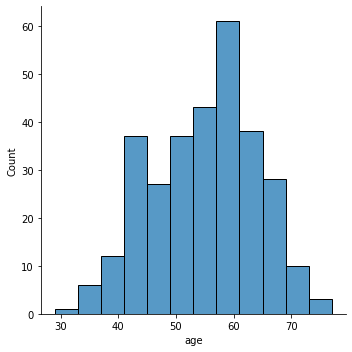

In [5]:
sns.displot(df['age']);

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

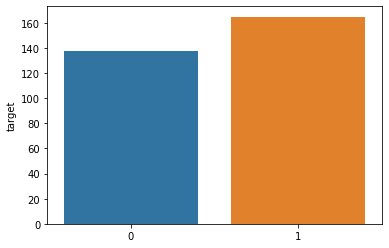

In [7]:
sns.barplot(x=df['target'].value_counts().index, y=df['target'].value_counts());

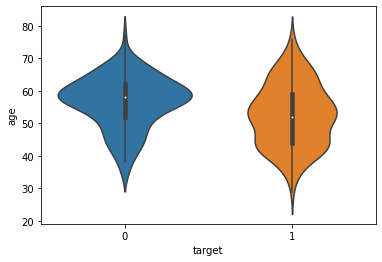

In [8]:
sns.violinplot(x=df['target'], y=df['age']);

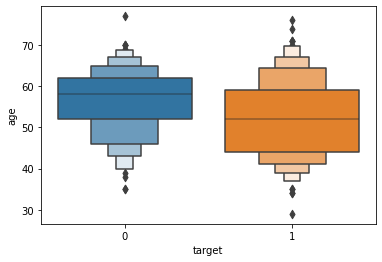

In [9]:
sns.boxenplot(x=df['target'], y=df['age']);

In [10]:
correlation = df.corr().loc[num_features, num_features]
correlation

,age,trestbps,chol,thalach
age,1.000000,0.279351,0.213678,-0.398522
trestbps,0.279351,1.000000,0.123174,-0.046698
chol,0.213678,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.046698,-0.009940,1.000000


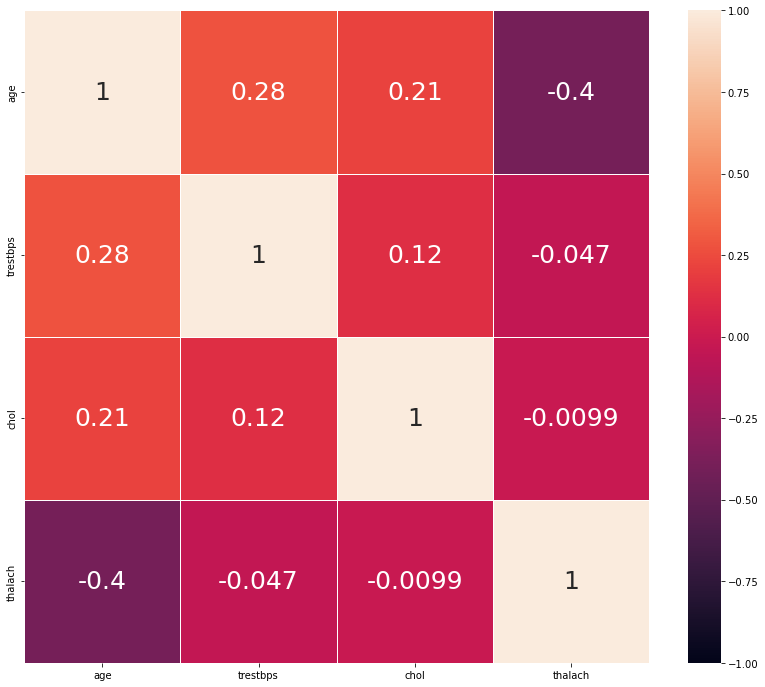

In [11]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation, annot=True, linewidth=0.5, linecolor='white',
           annot_kws={'size': 25}, vmax=1, vmin=-1);

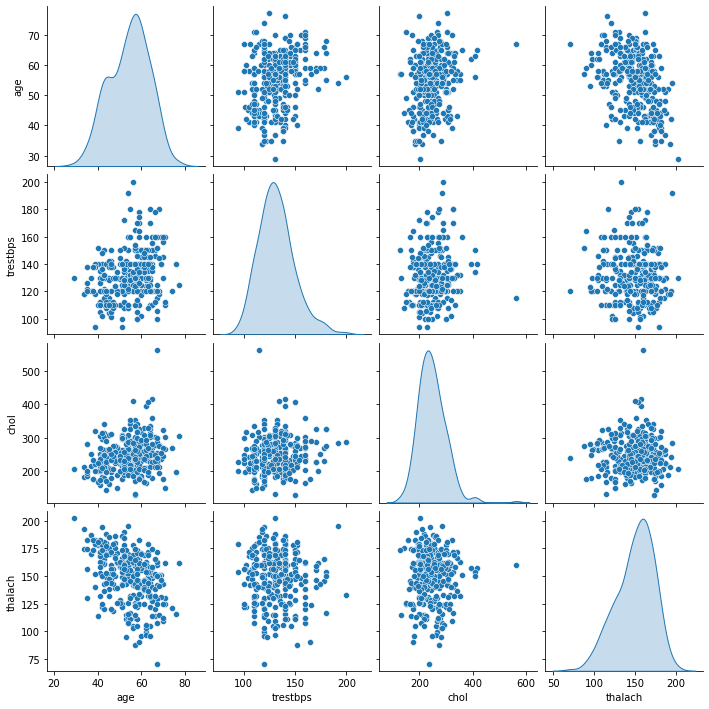

In [12]:
sns.pairplot(df[num_features], diag_kind='kde');

In [13]:
df_melted = pd.melt(df, id_vars='age', value_vars=cat_features)

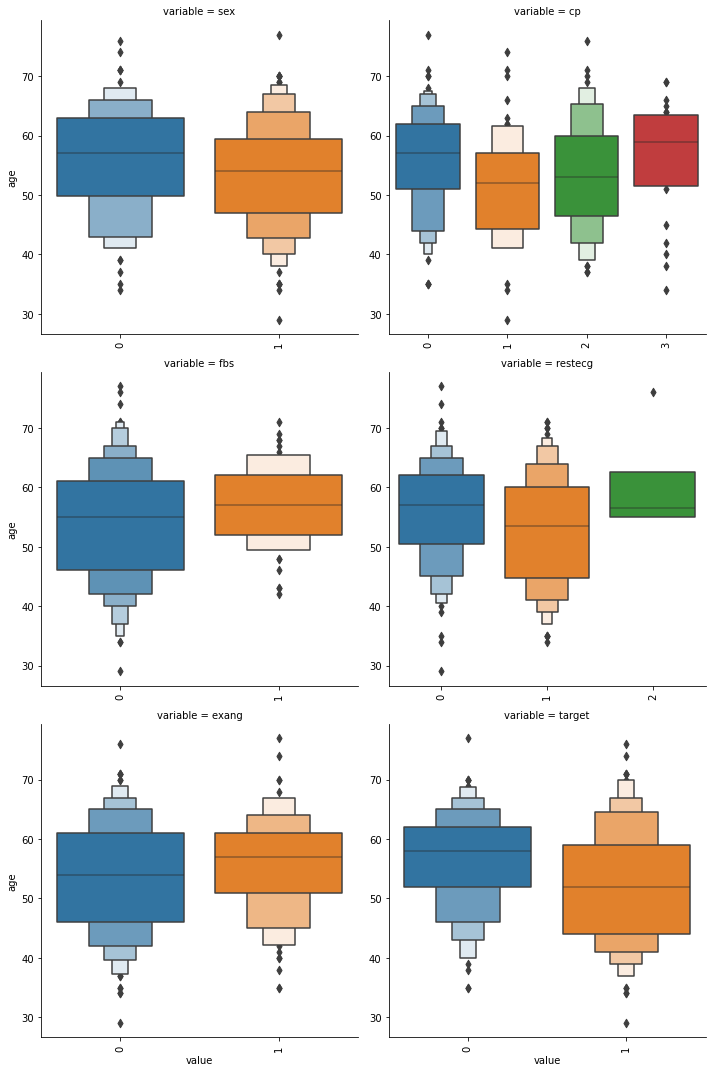

In [14]:
def boxplot(x, y, **kwargs):
    sns.boxenplot(x=x, y=y)
    x = plt.xticks(rotation=90)
    
g = sns.FacetGrid(df_melted, col='variable', col_wrap=2,
                 sharex=False, sharey=False, height=5)
g.map(boxplot, 'value', 'age');

In [20]:
!pip install plotly
import plotly.graph_objects as go
import plotly.express as ex

gapminder = pd.read_csv('../Downloads/gapminderData.csv')
gapminder['continent'] = pd.Categorical(gapminder['continent'])
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [19]:
germany = gapminder[gapminder['country'] == 'Germany']
germany

,country,year,pop,continent,lifeExp,gdpPercap
564,Germany,1952,69145952.0,Europe,67.500,7144.114393
565,Germany,1957,71019069.0,Europe,69.100,10187.826650
566,Germany,1962,73739117.0,Europe,70.300,12902.462910
567,Germany,1967,76368453.0,Europe,70.800,14745.625610
568,Germany,1972,78717088.0,Europe,71.000,18016.180270
569,Germany,1977,78160773.0,Europe,72.500,20512.921230
570,Germany,1982,78335266.0,Europe,73.800,22031.532740
571,Germany,1987,77718298.0,Europe,74.847,24639.185660
572,Germany,1992,80597764.0,Europe,76.070,26505.303170
573,Germany,1997,82011073.0,Europe,77.340,27788.884160


In [25]:
trace = go.Bar(x=germany['year'], y=germany['lifeExp'])
layout = go.Layout(title='Life Expectancy in Germany from 1952 to 2007')
fig = go.Figure(data=trace, layout=layout)
fig

In [27]:
trace = go.Scatter(x=germany['year'], y=germany['lifeExp'])
layout = go.Layout(title='Life Expectancy in Germany from 1952 to 2007', yaxis={'range': [0, 90]})
fig = go.Figure(data=trace, layout=layout)
fig

In [29]:
afghanistan = gapminder[gapminder['country'] == 'Afghanistan']

In [32]:
trace0 = go.Scatter(x=germany['year'], y=germany['lifeExp'], name='Germany')
trace1 = go.Scatter(x=afghanistan['year'], y=afghanistan['lifeExp'], name='Afganistan')

layout = go.Layout(title='Life Expectancy in Germany and Afganistan from 1952 to 2007', yaxis={'range': [0, 90]})
fig = go.Figure(data=[trace0, trace1], layout=layout)
fig

In [34]:
gapminder_1972 = gapminder[gapminder['year'] == 1972]
gapminder_1972

,country,year,pop,continent,lifeExp,gdpPercap
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
16,Albania,1972,2263554.0,Europe,67.690,3313.422188
28,Algeria,1972,14760787.0,Africa,54.518,4182.663766
40,Angola,1972,5894858.0,Africa,37.928,5473.288005
52,Argentina,1972,24779799.0,Americas,67.065,9443.038526
...,...,...,...,...,...,...
1648,Vietnam,1972,44655014.0,Asia,50.254,699.501644
1660,West Bank and Gaza,1972,1089572.0,Asia,56.532,3133.409277
1672,"Yemen, Rep.",1972,7407075.0,Asia,39.848,1265.047031
1684,Zambia,1972,4506497.0,Africa,50.107,1773.498265


In [39]:
trace = go.Choropleth(z=gapminder_1972['lifeExp'],
                     locations=gapminder_1972['country'],
                     locationmode='country names')

fig = go.Figure(data=trace)

fig

In [40]:
trace0 = go.Scatter(
    x = gapminder_1972['gdpPercap'],
    y = gapminder_1972['lifeExp'],
    mode = 'markers',
    marker = dict(size = gapminder_1972['pop']/8000000,
                color = gapminder_1972['continent'].cat.codes,
                opacity = 0.7,
                colorscale ='Viridis',
                showscale =False),
    text = gapminder_1972['country'],
    hovertemplate =
    '<b>%{text}</b>' +
    '<br><i>GDG per Capita</i>: %{x}' +
    '<br><i>Life Expectancy</i>: %{y}',
    )

layout = go.Layout(title='Life Expectancy v. Per Capita GDP in 1972',
                   xaxis=dict(
                        title='GDP per capita',
                        type='log'),
                    yaxis=dict(
                        title='Life Expectancy (years)'))


fig = go.Figure(data = [trace0], layout = layout)
fig

In [41]:
import plotly.express as px

px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [42]:
df = pd.read_csv('../Downloads/UrbanizationCensusTract.csv')
df.head()

,Unnamed: 0,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
0,0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367,7.520235
1,1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914,7.683404
2,2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098,8.127109
3,3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200,8.358666
4,4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200,9.206834


In [45]:
len(df['urbanindex'].unique())

63168

<AxesSubplot:xlabel='population'>

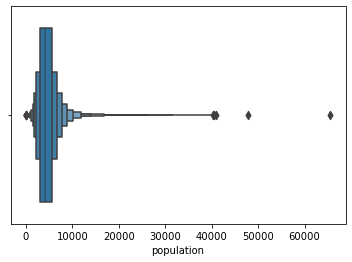

In [58]:
sns.boxenplot(x=df['population']);

In [67]:
alaska = df[df['state'] == 'Alaska']
tmp = alaska.groupby('gisjoin')['population'].sum()
tmp
#sns.displot(x=tmp['population']);

gisjoin
G0200130000100    3338
G0200160000100     975
G0200160000200    4809
G0200200000101    5514
G0200200000102    5198
                  ... 
G0202820000100     682
G0202900000100    1224
G0202900000200    1378
G0202900000300    1823
G0202900000400    1028
Name: population, Length: 165, dtype: int64

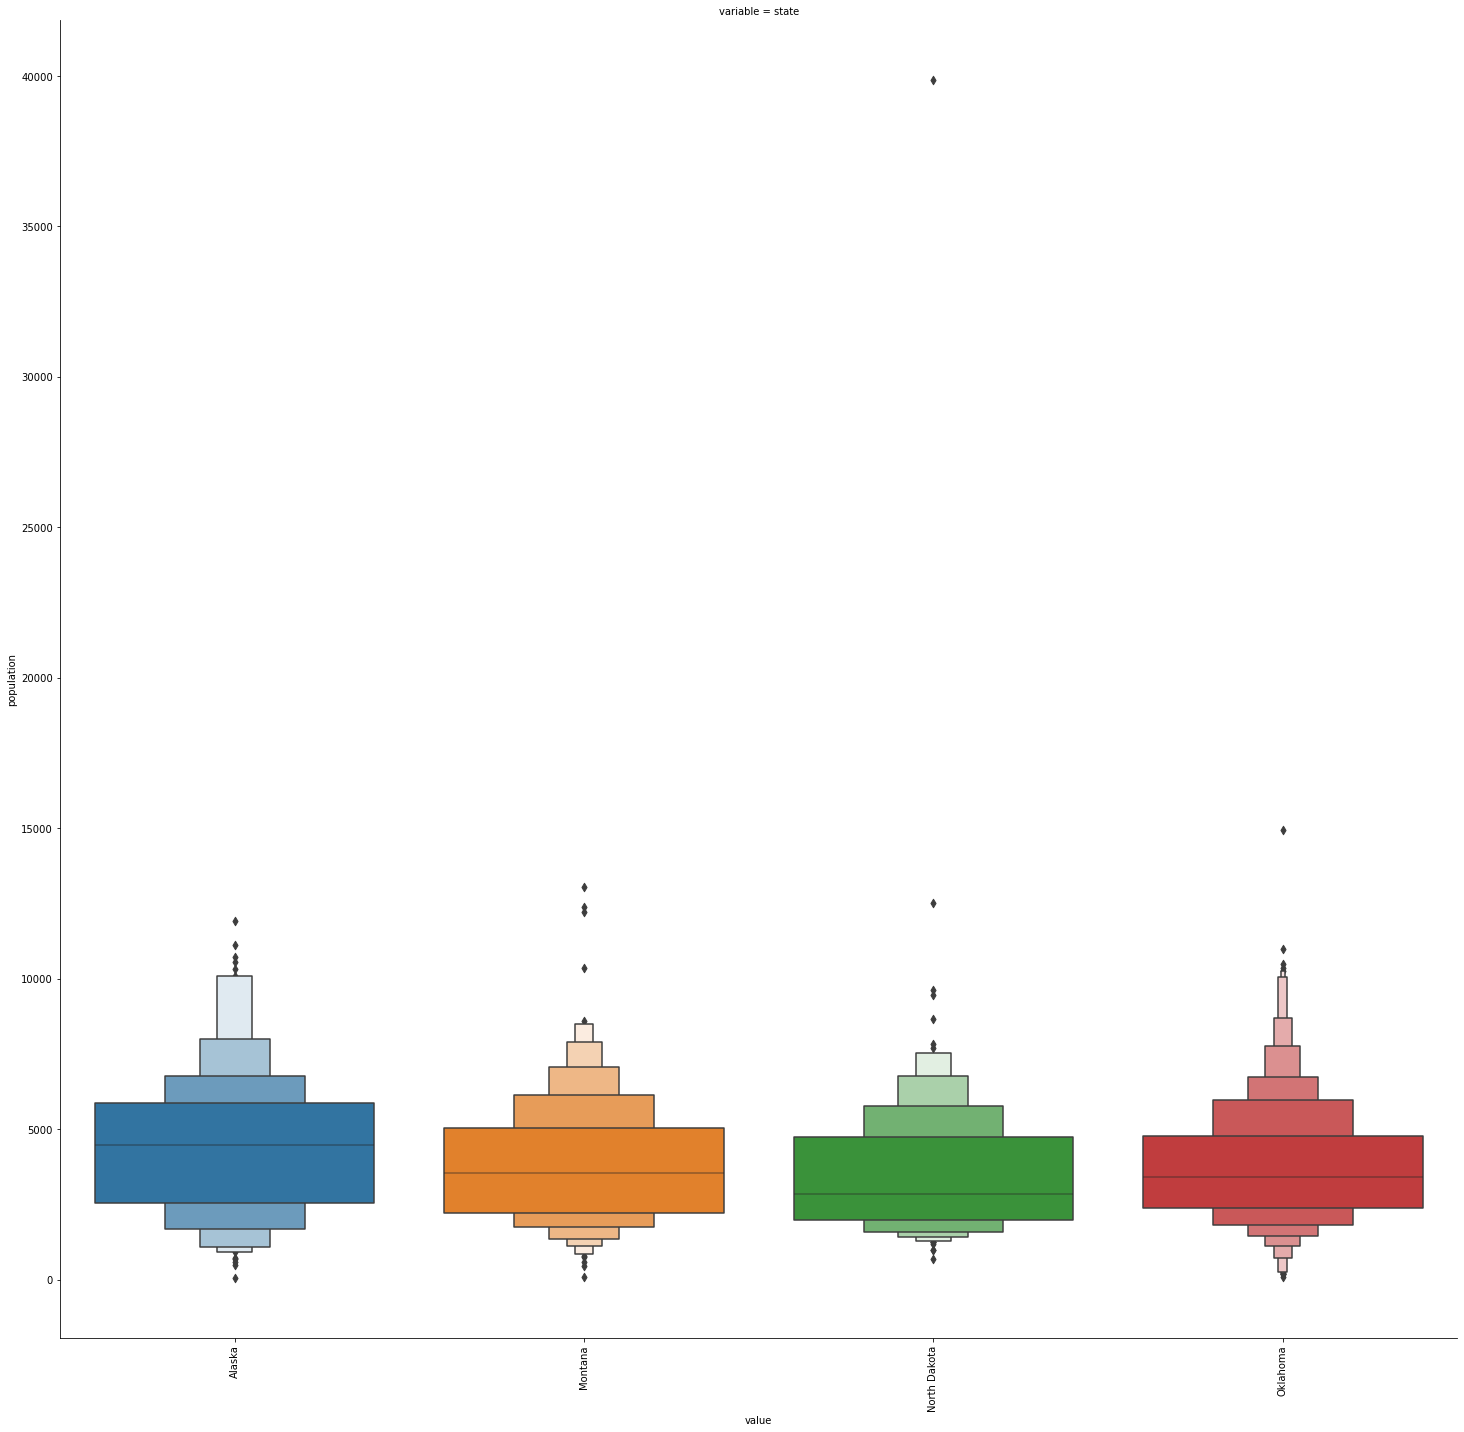

In [122]:
df1 = df[(df['state'] == 'Oklahoma') | (df['state'] == 'Alaska') |
         (df['state'] == 'North Dakota') | (df['state'] == 'Montana')]
df_melted = pd.melt(df1, id_vars='population', value_vars='state')
def boxplot(x, y, **kwargs):
    sns.boxenplot(x=x, y=y)
    x = plt.xticks(rotation=90)
    
g = sns.FacetGrid(df_melted, col='variable', col_wrap=2,
                 sharex=False, sharey=False, height=20)
g.map(boxplot, 'value', 'population');

In [98]:
correlation = df.corr().loc[['population', 'adj_radiuspop_5', 'urbanindex']]
correlation

,Unnamed: 0,statefips,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
population,-0.020524,-0.026953,-0.094403,-0.083581,1.000000,-0.036867,0.045142,0.865778
adj_radiuspop_5,-0.046987,-0.026962,0.060459,0.077365,-0.036867,1.000000,0.590165,-0.042525
urbanindex,-0.093138,-0.078511,-0.067592,0.005284,0.045142,0.590165,1.000000,0.047336


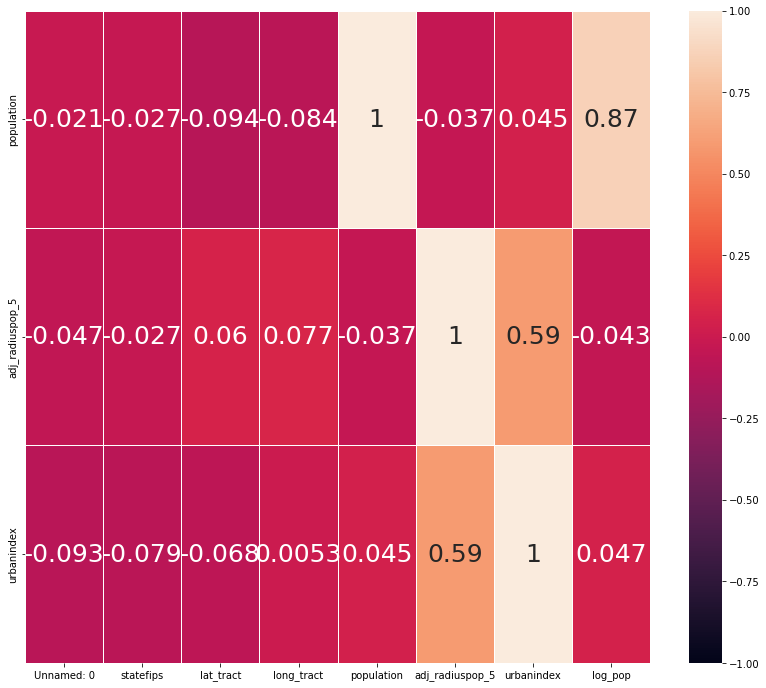

In [99]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation, annot=True, linewidth=0.5, linecolor='white',
           annot_kws={'size': 25}, vmax=1, vmin=-1);

<AxesSubplot:>

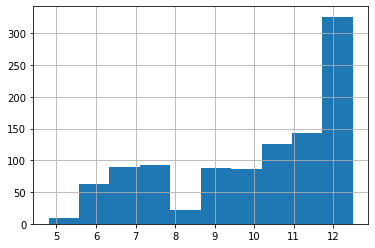

In [116]:
df[df['state'] == 'Oklahoma']['urbanindex'].hist()

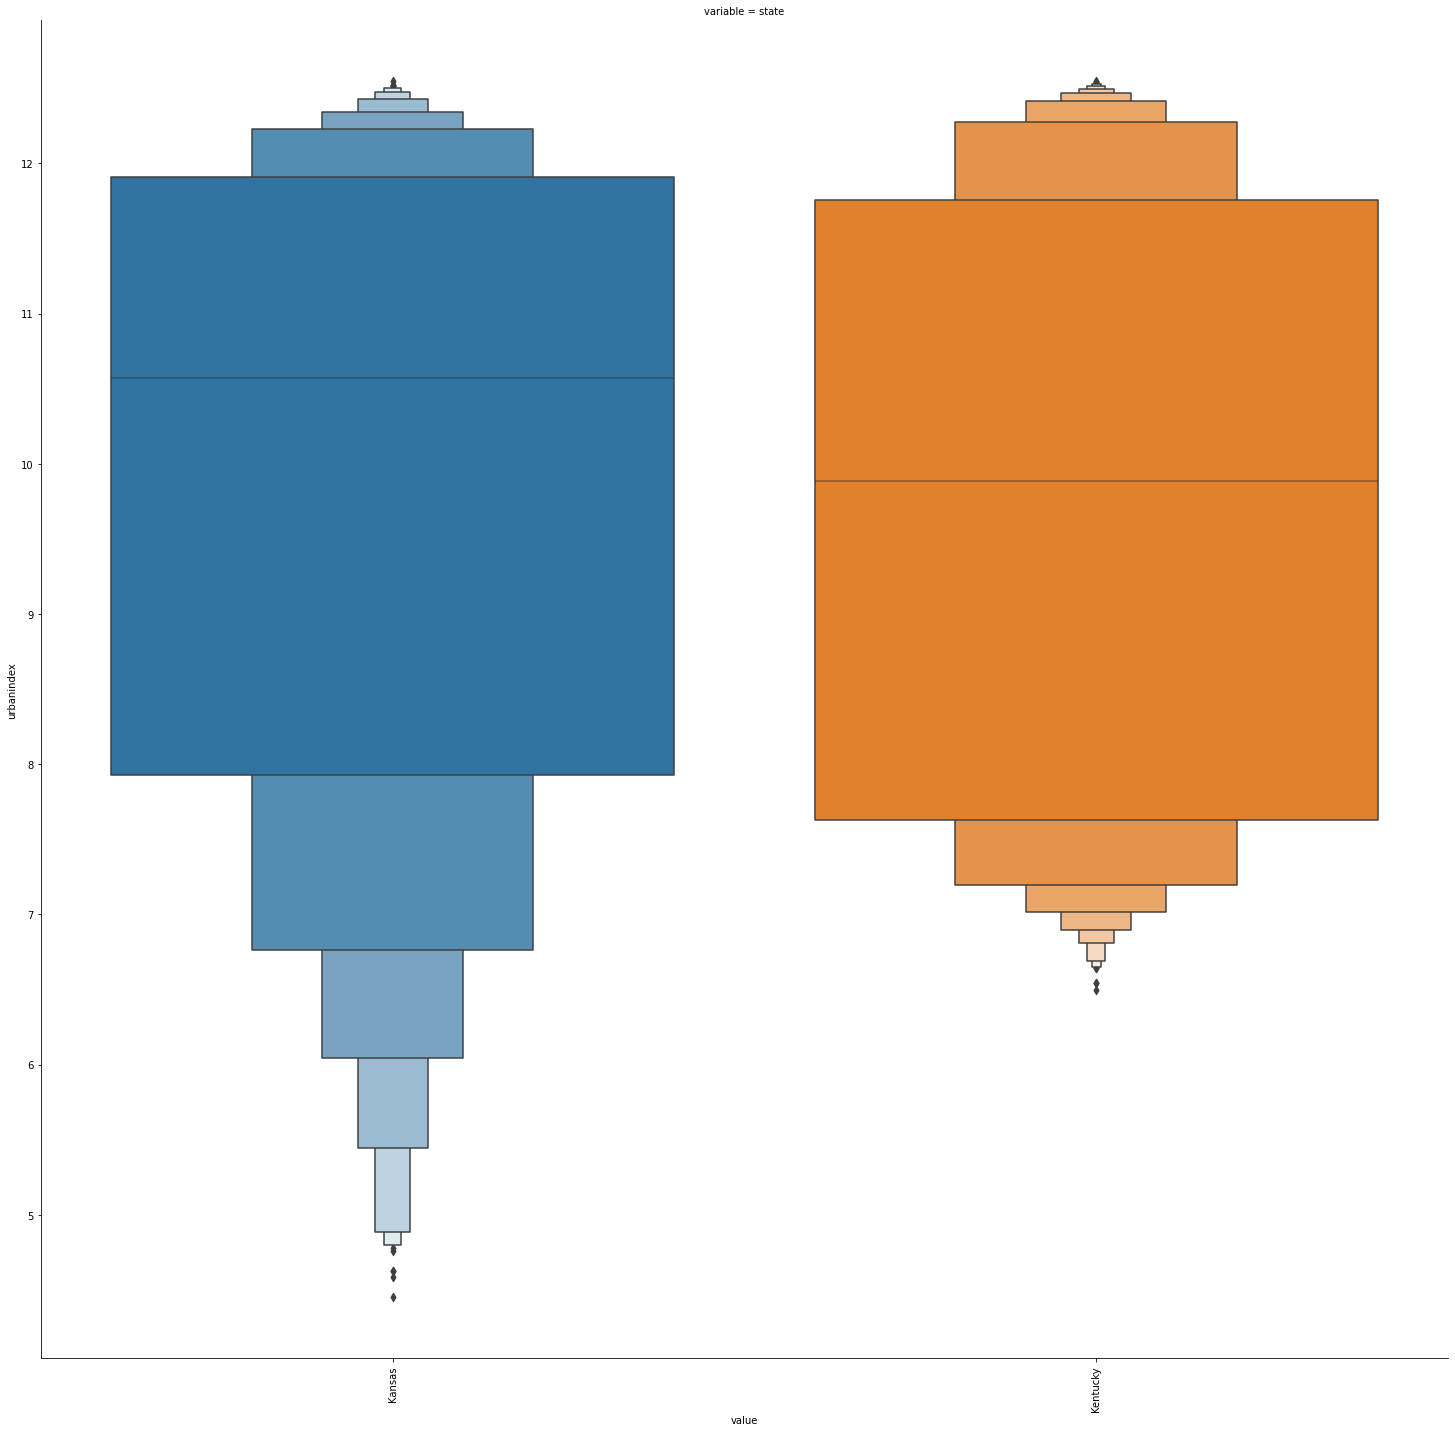

In [123]:
df1 = df[df['state'].isin(['Kansas', 'Kentucky'])]
df_melted = pd.melt(df1, id_vars='urbanindex', value_vars='state')
def boxplot(x, y, **kwargs):
    sns.boxenplot(x=x, y=y)
    x = plt.xticks(rotation=90)
    
g = sns.FacetGrid(df_melted, col='variable', col_wrap=2,
                 sharex=False, sharey=False, height=20)
g.map(boxplot, 'value', 'urbanindex');

In [139]:
dt = df[df['state'] == 'Texas']

mean = dt['urbanindex'].mean()
std = dt['urbanindex'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std

print((dt[dt['urbanindex'] > std_threshold_top].shape))
print(dt[dt['urbanindex'] < std_threshold_bottom].shape)

(0, 10)
(122, 10)


In [149]:
correlation = df.groupby('statefips')['population'].corr(df['adj_radiuspop_5'])
correlation.apply(np.abs).sort_values( ascending=False)

statefips
22    0.382162
55    0.301367
39    0.289965
30    0.272313
46    0.248568
15    0.245330
50    0.243049
24    0.239319
38    0.238687
10    0.225188
16    0.225128
72    0.224706
2     0.215601
26    0.206293
54    0.193338
40    0.177242
29    0.174164
28    0.153192
25    0.147051
17    0.143212
9     0.137523
1     0.128858
6     0.119222
18    0.118356
5     0.100046
31    0.095743
23    0.090969
19    0.088780
53    0.088292
51    0.086071
47    0.084016
27    0.080082
11    0.072961
33    0.058672
49    0.054712
45    0.050170
41    0.048539
37    0.043747
42    0.041838
8     0.039581
34    0.038383
32    0.034374
21    0.033833
44    0.027268
35    0.025767
12    0.018896
20    0.017671
36    0.016598
4     0.016303
56    0.007016
13    0.005344
48    0.002168
Name: population, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation, annot=True, linewidth=0.5, linecolor='white',
           annot_kws={'size': 25}, vmax=1, vmin=-1);